In [1]:
import pandas as pd

# 1 데이터 로딩

In [3]:
df = pd.read_csv("cdn_page_load_times.csv")
df.head()

,CDN_A,CDN_B,CDN_C
0,103.115543,102.342433,98.371838
1,94.341060,118.835131,86.193353
2,114.586739,104.359728,79.047870
3,156.155017,90.357875,63.730201
4,156.920524,75.013771,116.655484


# 2 가설설정 방법 선택.

독립된 3곳의(A, B, C)사의 페이지 로드시간에 관한 데이터  속도를 측정하므로, 일원분산분석(one-way anova)을 실시하기로 함.

In [7]:
# 데잍터 분할

A = df['CDN_A'].dropna().values
B = df['CDN_B'].dropna().values
C = df['CDN_C'].dropna().values

In [10]:
len(A), len(B), len(C)

(100, 100, 100)

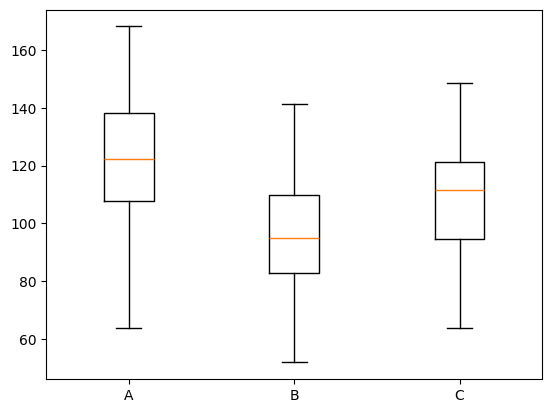

In [13]:
# 데이터 시각화

from matplotlib import pyplot as plt

plt.boxplot([A, B, C])
plt.xticks([1, 2, 3], ['A', 'B', 'C'])
plt.show()

# 3데이터 전제조건 확인 및 결과해석

In [5]:

# 1. 정규성 검정 - > shapiro-Wilk 검정

In [14]:
from scipy import stats as st
print(st.shapiro(A-B))
print(st.shapiro(B-C))
print(st.shapiro(C-A))

ShapiroResult(statistic=np.float64(0.9940977465531138), pvalue=np.float64(0.9446069376138456))
ShapiroResult(statistic=np.float64(0.9821121731681786), pvalue=np.float64(0.19351085781526473))
ShapiroResult(statistic=np.float64(0.9898981527862001), pvalue=np.float64(0.6563609451801026))


A-B, B-C, C-A 각 p-value값이 > 0.05 이므로 각 차이값이 정규성이 해석할 수 있다.

In [15]:
#2. 등분산성 검정 -> 레빈 검정 (Levene's Test)

In [16]:
levene_stat, levene_p_value = st.levene(A, B, C, center='median')
print(f"levene_stat: {levene_stat}, levene_p_value: {levene_p_value}")

levene_stat: 0.6331383822746123, levene_p_value: 0.5316379878247817


levene 테스트 결과, p-value값이 > 0.05 이므로 분산이 동일하다고 해석할 수 있다.

# 4 가설검정 수행 및 결과 해석

In [20]:
#anova분석 수행.
# H0 : mean(A) = mean(B) = mean(C) , H1 : 최소 한개 그룹에서는 차이가 있다.

In [21]:
st.f_oneway(A,B,C)

F_onewayResult(statistic=np.float64(39.192607237897704), pvalue=np.float64(7.842852500131719e-16))

In [22]:
# 해석
# p-value 값이 < 0.05 이므로 귀무가설을 기각, 즉 대립가설인 최소 하나의 그룹에서 데이터 로드 시간에 차이가 있다고 판단이 된다.

# 사후분석 및 결과해석

In [23]:
#! pip install statsmodels

In [27]:
# tukeyhsd테스트 시행

from statsmodels.stats import multicomp
Data = A.tolist() + B.tolist() + C.tolist()
# 각 값이 속한 그룹 이름
Group = ['A'] * len(A) + ['B'] * len(B) + ['C'] * len(C)

print(multicomp.pairwise_tukeyhsd(Data, Group))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B -24.8154    0.0 -31.4178 -18.213   True
     A      C -12.5563    0.0 -19.1587 -5.9538   True
     B      C  12.2591 0.0001   5.6567 18.8616   True
-----------------------------------------------------


각각의 그룹에서 모두 reject가 나왔으므로 3 집단의 차이가 모두 존재하고,
A, B 의 평균이 A가 24.81만큼 낮고,
A, C의 평균은 A 가 12.55만큼 낮고,
B, C의 평균은 B 가 12.25만큼 크므로, 데이터 로딩속도의 평균은 B>C>A순으로 나타난다고 해석할 수 있음.

즉, 로딩속도의 빠른 순은 A, C, B로 해석가능.